# Parametric model inference illustration

In [1]:
#%%
import numpy as np
from sklearn.datasets import make_regression
from ml_uncertainty.model_inference.parametric_model_inference import (
    ParametricModelInference,
)
from sklearn.linear_model import ElasticNet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.random.seed(1)


# Create a test case for elastic net regression and test the inference with
# the created class.
X, y = make_regression(n_samples=20, n_features=5, n_informative=1, noise=10)

regr = ElasticNet(alpha=0.01, l1_ratio=0.5)

regr.fit(X, y)


ElasticNet(alpha=0.01)

<Axes: xlabel='mean'>

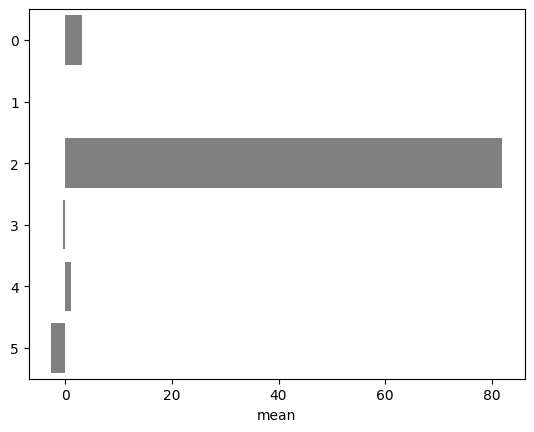

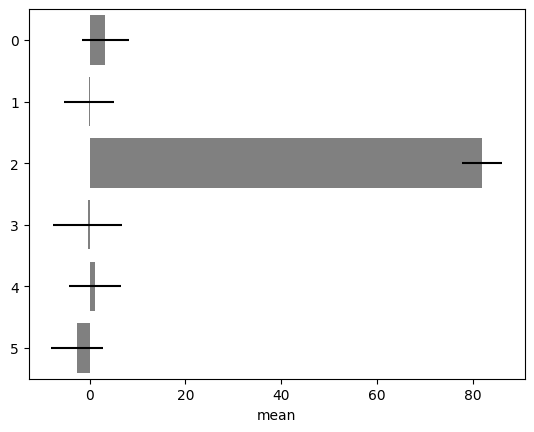

In [3]:
#%%
# Get parameteric model inference
inf = ParametricModelInference()

inf.set_up_model_inference(X_train=X, y_train=y, estimator=regr)

# Should return a dataframe of parameters and their CIs.
# Each element corresponding to one output.
df_imp = inf.get_parameter_errors()

y_pred = regr.predict(X)

# Feature importance plots. Make plots of these

# Normal plot
sns.barplot(
    x=df_imp["mean"],
    y=df_imp.index.astype("category"),
    color="gray",
    capsize=10,
)

plt.figure()
# With error bars
sns.barplot(
    x=df_imp["mean"],
    y=df_imp.index.astype("category"),
    xerr=(
        df_imp["mean"] - df_imp["lower_bound"],
        df_imp["upper_bound"] - df_imp["mean"],
    ),
    color="gray",
    capsize=10,
)


R2 = 0.9917151481806437


<ErrorbarContainer object of 3 artists>

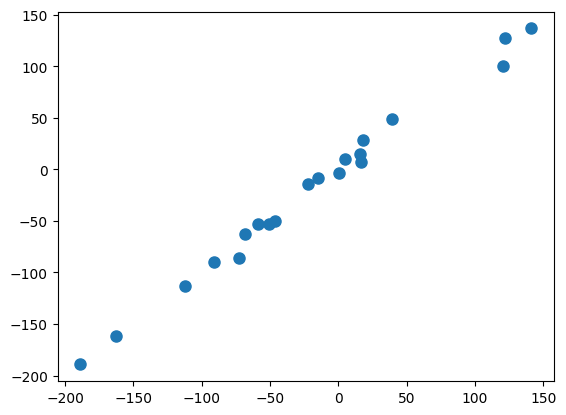

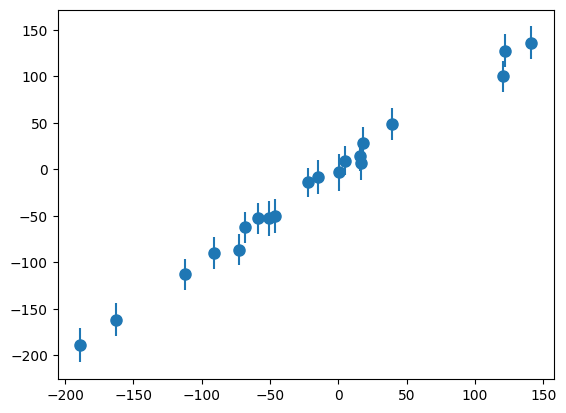

In [4]:
#%%
# Compute confidence intervals.
df_int = inf.get_intervals(X)

# Normal: Y prediction versus actual.
plt.figure()
plt.errorbar(y, y_pred, marker="o", markersize=8, ls="none", zorder=0)

print(f"R2 = {r2_score(y, y_pred)}")

# With predicted error values.
plt.figure()
plt.errorbar(
    y,
    y_pred,
    yerr=(
        df_int["mean"] - df_int["lower_bound"],
        df_int["upper_bound"] - df_int["mean"],
    ),
    marker="o",
    markersize=8,
    ls="none",
    zorder=0,
)
